# Клима во Македонија

Моделирајте ја климата во Македонија преку Маркова верига. Еден ден го опишуваме како сончев, врнежлив, снежен или пак облачен.

*  Како (преку веројатност за типот на денот) ќе ја опишете климата во Македонија?
*  Ако денеска вее снег, колкава е веројатноста за 3 дена да е сончево?
*  Ако денеска врне, за колку дена ќе престане?

## Решение

За да ја добиеме Марковата верига можеме да искористиме статистички податоци за климата во Македонија, но може и ние сами од искуство да си ја конструираме. Нека Марковата верига изгледа вака

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pydtmc as mc

In [3]:
states = np.array(['rainy', 'sunny', 'snowy', 'windy'])
p = pd.DataFrame([[0.2, 0.3, 0.05, 0.45], [0.15, 0.5, 0.02, 0.33], [0.15, 0.15, 0.5, 0.2], [0.3, 0.3, 0.1, 0.3]], columns=states, index=states)
p

rainy  sunny  snowy  windy
rainy   0.20   0.30   0.05   0.45
sunny   0.15   0.50   0.02   0.33
snowy   0.15   0.15   0.50   0.20
windy   0.30   0.30   0.10   0.30


DISCRETE-TIME MARKOV CHAIN
 SIZE:         4
 CLASSES:      1
  - RECURRENT: 1
  - TRANSIENT: 0
 ABSORBING:    NO
 APERIODIC:    YES
 IRREDUCIBLE:  YES
 ERGODIC:      YES



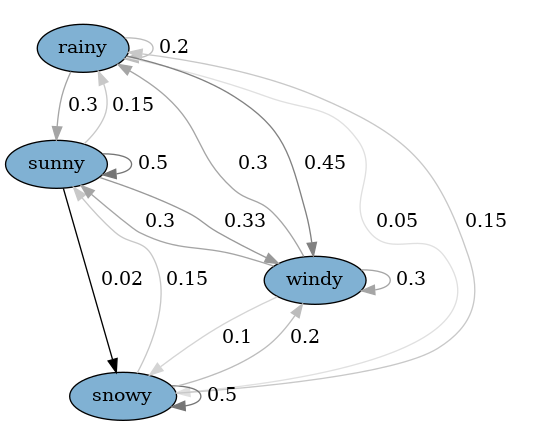

In [4]:
def draw_markov_chain(chain):
    plt.ioff()
    print(chain)
    fig, ax = mc.plot_graph(chain)
    ax.set_visible(False)
    plt.show()

chain = mc.MarkovChain(p, states)
draw_markov_chain(chain)

### Одговор на задача 1

*  Како (преку веројатност за типот на денот) ќе ја опишете климата во Македонија?

Земајќи ја на влез оваа Маркова верига, климата во Македонија можеме да ја опишеме преку стационарната распределба на веригата. Оваа верига е нескратилива и апериодична, па заклучуваме дека ќе има единствено решение кое ќе ја опише климата.

### Одговор на задача 2

*  Ако денеска вее снег, колкава е веројатноста за 3 дена да е сончево?


За да знаеме каков ќе биде воздухот по 3 дена, ќе пресметаме $ \pi^{(0)} P^{3} $.

In [6]:
# Денеска е снежно
pi_0 = [0, 0, 1, 0]
# По 3 дена
pi_3 = pi_0 @ np.linalg.matrix_power(p, 3)
pi_3

array([0.200925, 0.308925, 0.182425, 0.307725])

Втората вредност од редицата на добиената распределба на веројатност е веројатноста времето да е сончево по 3 дена. Испаѓа дека таа веројатност е нешто над 30%.

### Одговор на задача 3

*  Ако денеска врне, за колку дена ќе престане?

Сметаме дека се наоѓаме во врнежливата сосојтба и го гледаме времето потребно да ја напуштиме оваа состојба. Затоа ќе го пресметаме времето на достигнување до која било состојба освен врнежливата.

Ако пресметуваме рачно, ќе ја користиме равенката за време на достигнување. Во тој случај времињата $t_2$, $t_3$ и $t_4$, соодветно за состојбите сончево, снежно и облачно, ќе ги поставиме да бидат еднакви на нула.

Преку библиотеката `pydtmc` ќе ја искористиме фукнцијата `mean_first_passage_times_to()` каде како аргументи ќе ги испратиме сите други сосојтби освен врнежливата.

In [17]:
t = chain.mean_first_passage_times_to(['sunny', 'snowy', 'windy'])
t

array([1.25, 0.  , 0.  , 0.  ])

Ако денеска врне, ќе престане за 1.25 дена. 